In [1]:
import numpy as np
# import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorboard
from helpers import pre_process_input_data, convert_tweets_to_bert_embedding, generate_transfer_learn_classifier,generate_fine_tune_model,pre_process_bert_inputs


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [2]:
TWEET_FILEPATH = '/mnt/c/Users/alexs/ML/data/concept_net/tweets.csv'
raw_tweet_data = pre_process_input_data(TWEET_FILEPATH,num_samples=100000)

In [3]:
raw_tweet_data.columns

Index(['target', 'text'], dtype='object')

In [4]:
tmp = raw_tweet_data['target'].to_numpy()

tmp

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
res = convert_tweets_to_bert_embedding(raw_tweet_data['text'].to_numpy())

Grabbing BERT Embeddings with padding to 313 characters


  0%|          | 0/400 [00:00<?, ?it/s]

In [6]:
mdl = generate_transfer_learn_classifier()
mdl.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 768)]       0         
                                                                 
 dense (Dense)               (None, None, 128)         98432     
                                                                 
 dropout_37 (Dropout)        (None, None, 128)         0         
                                                                 
 dense_1 (Dense)             (None, None, 32)          4128      
                                                                 
 dense_2 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 102,593
Trainable params: 102,593
Non-trainable params: 0
_________________________________________________________________


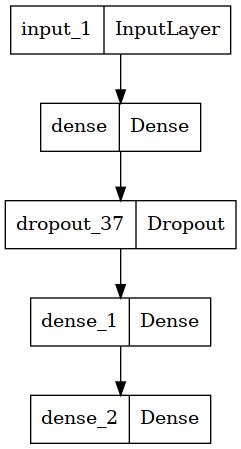

In [7]:
tf.keras.utils.plot_model(mdl)

In [8]:
from sklearn.model_selection import train_test_split
# raw_tweet_data.target.to_
x_train, x_test, y_train, y_test = train_test_split(res,raw_tweet_data['target'].to_numpy(),test_size=0.3)

print(f"""
x_train: {x_train.shape},
y_train: {y_train.shape},
x_test: {x_test.shape},
y_test: {y_test.shape}
""")


x_train: (140000, 768),
y_train: (140000,),
x_test: (60000, 768),
y_test: (60000,)



In [9]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([70169, 69831]))

In [10]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([29831, 30169]))

In [11]:

hist = mdl.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,min_delta=0.001)])

Epoch 1/100
4375/4375 [==============================] - 11s 2ms/step - loss: 0.4908 - accuracy: 0.7643 - val_loss: 0.4511 - val_accuracy: 0.7878
Epoch 2/100
4375/4375 [==============================] - 11s 2ms/step - loss: 0.4666 - accuracy: 0.7805 - val_loss: 0.4470 - val_accuracy: 0.7916
Epoch 3/100
4375/4375 [==============================] - 11s 2ms/step - loss: 0.4596 - accuracy: 0.7842 - val_loss: 0.4482 - val_accuracy: 0.7934
Epoch 4/100
4375/4375 [==============================] - 11s 2ms/step - loss: 0.4544 - accuracy: 0.7874 - val_loss: 0.4420 - val_accuracy: 0.7951
Epoch 5/100
4375/4375 [==============================] - 11s 2ms/step - loss: 0.4513 - accuracy: 0.7890 - val_loss: 0.4460 - val_accuracy: 0.7972
Epoch 6/100
4375/4375 [==============================] - 11s 2ms/step - loss: 0.4484 - accuracy: 0.7908 - val_loss: 0.4396 - val_accuracy: 0.7984
Epoch 7/100
4375/4375 [==============================] - 11s 3ms/step - loss: 0.4458 - accuracy: 0.7927 - val_loss: 0.4473 -

In [12]:
from helpers import plot_history


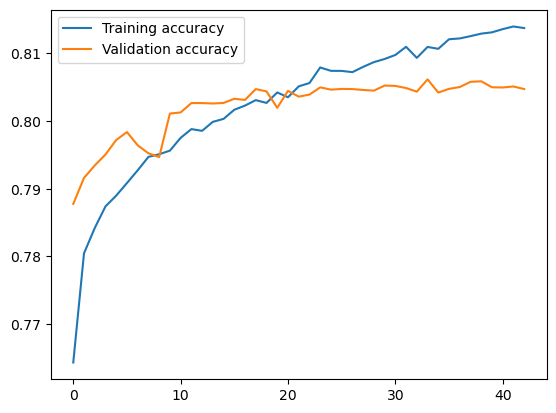

In [13]:
plot_history(hist.history,metric='accuracy')

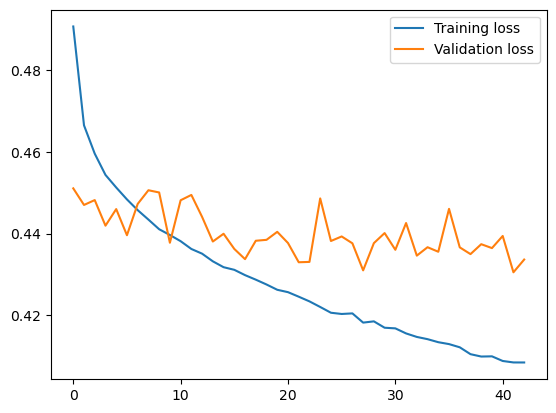

In [14]:
plot_history(hist.history,metric='loss')

In [15]:
fine_tune_model = generate_fine_tune_model()
fine_tune_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, None)]       0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]',   

In [16]:
x_train, x_test, y_train, y_test = train_test_split(raw_tweet_data['text'].to_numpy(),raw_tweet_data['target'].to_numpy(),test_size=0.3)

print(f"""
x_train: {x_train.shape},
y_train: {y_train.shape},
x_test: {x_test.shape},
y_test: {y_test.shape}
""")


x_train: (140000,),
y_train: (140000,),
x_test: (60000,),
y_test: (60000,)



In [17]:
x_train,y_train = pre_process_bert_inputs(x_train,y_train)
x_test,y_test = pre_process_bert_inputs(x_test,y_test)

In [18]:
hst = fine_tune_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4,min_delta=0.001)])

Epoch 1/50
4375/4375 [==============================] - 335s 76ms/step - loss: 0.4840 - accuracy: 0.7676 - val_loss: 0.4123 - val_accuracy: 0.8134
Epoch 2/50
4375/4375 [==============================] - 331s 76ms/step - loss: 0.4268 - accuracy: 0.8067 - val_loss: 0.4043 - val_accuracy: 0.8201
Epoch 3/50
4375/4375 [==============================] - 331s 76ms/step - loss: 0.4125 - accuracy: 0.8139 - val_loss: 0.3907 - val_accuracy: 0.8248
Epoch 4/50
4375/4375 [==============================] - 331s 76ms/step - loss: 0.4027 - accuracy: 0.8193 - val_loss: 0.3861 - val_accuracy: 0.8269
Epoch 5/50
4375/4375 [==============================] - 331s 76ms/step - loss: 0.3947 - accuracy: 0.8230 - val_loss: 0.3800 - val_accuracy: 0.8304
Epoch 6/50
4375/4375 [==============================] - 331s 76ms/step - loss: 0.3870 - accuracy: 0.8271 - val_loss: 0.3765 - val_accuracy: 0.8318
Epoch 7/50
4375/4375 [==============================] - 331s 76ms/step - loss: 0.3801 - accuracy: 0.8309 - val_loss: 0

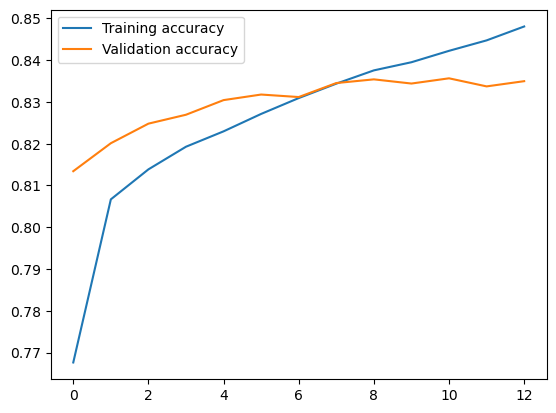

In [19]:
plot_history(hst.history,metric='accuracy')

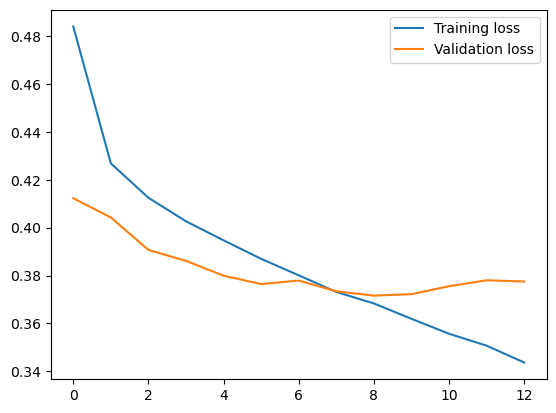

In [20]:
plot_history(hst.history,metric='loss')